# Qn 1

Name: Tan Wen Tao Bryan<br>
Class: DAAA/FT/2A/01<br>
StudentID: p2214449

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
data = pd.read_excel("./dairy_nutrition_9.xlsx")
display(data)

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113
...,...,...,...,...,...,...,...,...,...,...
167,Milk,"Milk, fluid, 1% fat, without added vitamin A a...",3.47,1.06,4.88,5.30,16,0.032,0.41,120
168,Cream,"Cream, fluid, heavy whipping",2.11,32.00,2.88,2.88,420,0.019,0.14,62
169,Yogurt,"Yogurt, fruit, lowfat, with low calorie sweete...",4.78,1.39,17.90,3.10,134,0.040,0.50,169
170,Yogurt,"Yogurt, fruit, low fat, 11 grams protein per 8...",4.91,1.43,18.60,0.00,0,0.045,0.55,171


In [3]:
data_r = data.drop( ['Type','Description'], axis = 1)
data_r.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


### 1a)

In [4]:
# implementing PCA using sklearn
from sklearn.decomposition import PCA

#convert to standardized values as the symbols and magnitude are different
data_r = (data_r - data_r.mean())/data_r.std()
pca = PCA(n_components=8).fit(data_r)

#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_r)
print(pca_samples)

[[ 0.95354228 -0.49685818  0.78948032 ...  0.12690268  0.16780203
   0.02485626]
 [-0.77225892 -0.33956446 -1.27696566 ...  0.17999148 -0.11661108
   0.09509813]
 [-1.21716103  1.05851399 -0.31923341 ...  0.37446687  0.6725352
   0.21759342]
 ...
 [-1.17084609  0.28823169  0.03799986 ...  0.27451939  0.48121273
   0.22245255]
 [-1.50886779  0.3659934   0.64541322 ...  0.38562412  0.59062121
   0.33859925]
 [-1.53451445  1.29613395 -0.01657953 ... -0.18205566 -0.25655035
  -0.04395238]]


In [5]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [6]:
pca_results = pca_results(data_r, pca)
pca_results

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7340,0.4667,0.4731,0.2974,0.0517,0.0786,0.3650,0.3601,0.4411,0.4706
PC 2,2.1422,0.2678,-0.1048,-0.3213,0.6244,0.6061,-0.1748,0.2503,0.1712,-0.0778
PC 3,0.9068,0.1134,0.1550,-0.5709,-0.2856,-0.3362,-0.4771,0.3537,0.3014,0.1095
PC 4,0.4683,0.0585,-0.3454,-0.0460,-0.0831,-0.1744,0.4802,0.6552,-0.0375,-0.4242
PC 5,0.3271,0.0409,0.0030,-0.6693,-0.0554,0.0376,0.6109,-0.3749,0.0646,0.1724
PC 6,0.1948,0.0243,-0.1971,0.1395,0.2573,-0.3394,0.0107,-0.3239,0.7438,-0.3194
PC 7,0.1478,0.0185,0.3735,-0.1012,0.6407,-0.5562,0.0527,0.0434,-0.3531,-0.0321
PC 8,0.0790,0.0099,-0.6660,0.0518,0.1980,-0.2387,-0.0442,0.0774,-0.0419,0.6692


Screeplot

<Figure size 432x288 with 0 Axes>

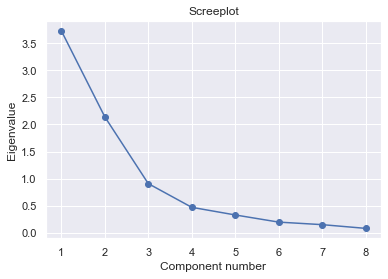

In [7]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker="o")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [8]:
#Extract only the three PCs
pca2 = PCA(n_components=3).fit(data_r)
scores2 = pca2.transform(data_r)

Loading Plot PC1 VS PC2

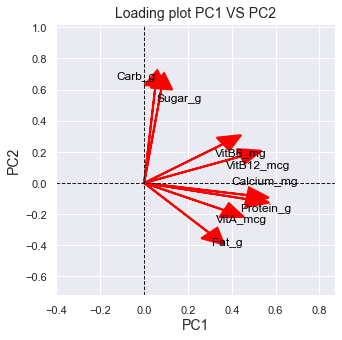

In [9]:
plt.clf
# loadingplot for PC1 against PC2
fig, ax = plt.subplots(figsize = (5,5))

#Set limits for figure
x_min = min(pca2.components_[0,:].min(),0)-0.4
x_max = max(pca2.components_[0,:].max(),0)+0.4
y_min = min(pca2.components_[1,:].min(),0)-0.4
y_max = max(pca2.components_[1,:].max(),0)+0.4

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#Scaling factor for text position
text_pos = 0.06

for i, v in enumerate(pca2.components_.T):
    ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    if data_r.columns[i] == "Carb_g":
        ax.text(v[0]-0.09, v[1]+text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)    
    elif data_r.columns[i] == "Calcium_mg":
        ax.text(v[0]+0.08, v[1]+text_pos+0.03, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)
    else:
        ax.text(v[0]+0.08, v[1]-text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_title("Loading plot PC1 VS PC2", fontsize = 14)
plt.show()

Loading Plot PC2 VS PC3

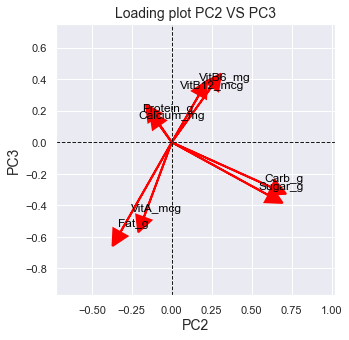

In [10]:
plt.clf
# loadingplot for PC2 against PC3
fig, ax = plt.subplots(figsize = (5,5))

#Set limits for figure
x_min = min(pca2.components_[1,:].min(),0)-0.4
x_max = max(pca2.components_[1,:].max(),0)+0.4
y_min = min(pca2.components_[2,:].min(),0)-0.4
y_max = max(pca2.components_[2,:].max(),0)+0.4

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#Scaling factor for text position
text_pos = 0.06

for i, v in enumerate(pca2.components_.T):
    ax.arrow(0, 0, v[1], v[2], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    ax.text(v[1]+0.08, v[2]+text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
ax.set_xlabel("PC2", fontsize=14)
ax.set_ylabel("PC3", fontsize=14)
ax.set_title("Loading plot PC2 VS PC3", fontsize = 14)
plt.show()

Loading Plot PC1 VS PC3

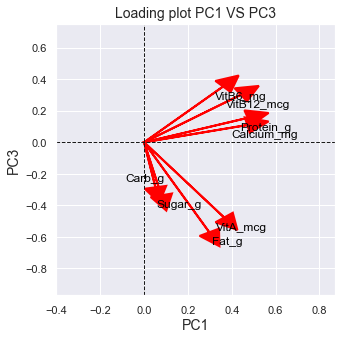

In [11]:
plt.clf
# loadingplot for PC1 against PC3
fig, ax = plt.subplots(figsize = (5,5))

#Set limits for figure
x_min = min(pca2.components_[0,:].min(),0)-0.4
x_max = max(pca2.components_[0,:].max(),0)+0.4
y_min = min(pca2.components_[2,:].min(),0)-0.4
y_max = max(pca2.components_[2,:].max(),0)+0.4

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#Scaling factor for text position
text_pos = 0.06

for i, v in enumerate(pca2.components_.T):
    ax.arrow(0, 0, v[0], v[2], head_width=0.1, head_length=0.1, linewidth=2, color='red')
    if data_r.columns[i] == "Carb_g":
        ax.text(v[0]-0.05, v[2]+text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)    
    else:
        ax.text(v[0]+0.08, v[2]-text_pos, data_r.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC3", fontsize=14)
ax.set_title("Loading plot PC1 VS PC3", fontsize = 14)
plt.show()

In [12]:
#Obtain scores from original data that are not centred
scores_notcentred = np.dot(data_r, pca2.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ['PC1', 'PC2','PC3'])
scores_notcentred.head()

,PC1,PC2,PC3
0,0.953542,-0.496858,0.789480
1,-0.772259,-0.339564,-1.276966
2,-1.217161,1.058514,-0.319233
3,-1.607844,-0.137269,0.417775
4,-1.607433,-0.138715,0.417260


Score Plot PC1 VS PC2

In [13]:
#All unique values of the type
print(data.iloc[:,0].unique())

['Cheese' 'Cream' 'Ice cream' 'Milk' 'Yogurt']


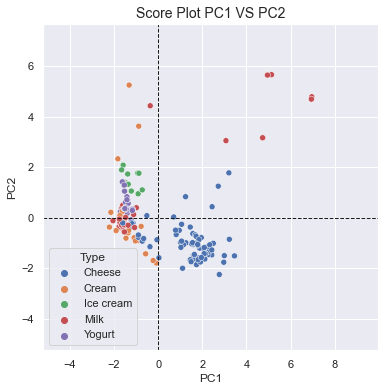

In [14]:
plt.clf
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="PC1", y="PC2", data = scores_notcentred, hue=data.iloc[:,0])    
    
#Set limits for figure
x_min = min(scores_notcentred['PC1'].min(),0)-3
x_max = max(scores_notcentred['PC1'].max(),0)+3
y_min = min(scores_notcentred['PC2'].min(),0)-3
y_max = max(scores_notcentred['PC2'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC1 VS PC2", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

Score Plot PC2 VS PC3

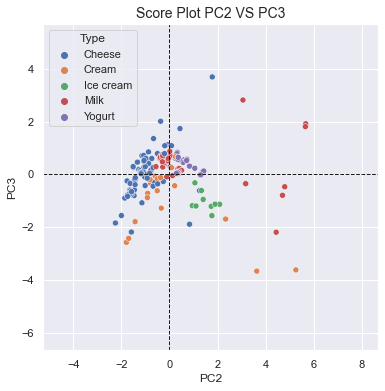

In [15]:
plt.clf
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="PC2", y="PC3", data = scores_notcentred, hue=data.iloc[:,0])    
    
#Set limits for figure
x_min = min(scores_notcentred['PC2'].min(),0)-3
x_max = max(scores_notcentred['PC2'].max(),0)+3
y_min = min(scores_notcentred['PC3'].min(),0)-3
y_max = max(scores_notcentred['PC3'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC2 VS PC3", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

Score Plot PC1 VS PC3

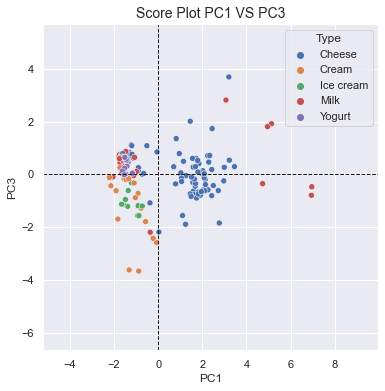

In [16]:
plt.clf
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x="PC1", y="PC3", data = scores_notcentred, hue=data.iloc[:,0])    
    
#Set limits for figure
x_min = min(scores_notcentred['PC1'].min(),0)-3
x_max = max(scores_notcentred['PC1'].max(),0)+3
y_min = min(scores_notcentred['PC3'].min(),0)-3
y_max = max(scores_notcentred['PC3'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC1 VS PC3", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

### 1c)

In [17]:
#Put product1 and product2 as a list of dictionaries
dairyProducts=[
    {
        "Type":"Product 1",
        "Description":"NIL",
        "Protein_g":22.17,
        "Fat_g":22.35,
        "Carb_g":2.22,
        "Sugar_g":1.01,
        "VitA_mcg":181,
        "VitB6_mg":0.034,
        "VitB12_mcg":2.28,
        "Calcium_mg":505
    },
    {
        "Type":"Product 2",
        "Description":"NIL",
        "Protein_g":4.32,
        "Fat_g":1.42,
        "Carb_g":23,
        "Sugar_g":14.58,
        "VitA_mcg":13,
        "VitB6_mg":0.047,
        "VitB12_mcg":0.53,
        "Calcium_mg":114
    }
]

In [18]:
dairydf = pd.concat((data, pd.DataFrame(dairyProducts))).reset_index().drop(columns="index")
dairydf

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,Cheese,"Cheese food, cold pack, American",19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,Cream,"Cream, whipped, cream topping, pressurized",3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,Ice cream,"Fat free ice cream, no sugar added, flavors ot...",4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,Milk,"Milk, whole, 3.25% milkfat, with added vitamin D",3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,Milk,"Milk, whole, 3.25% milkfat, without added vita...",3.15,3.27,4.78,5.05,46,0.036,0.45,113
...,...,...,...,...,...,...,...,...,...,...
169,Yogurt,"Yogurt, fruit, lowfat, with low calorie sweete...",4.78,1.39,17.90,3.10,134,0.040,0.50,169
170,Yogurt,"Yogurt, fruit, low fat, 11 grams protein per 8...",4.91,1.43,18.60,0.00,0,0.045,0.55,171
171,Yogurt,"Yogurt, fruit, low fat, 9 grams protein per 8 ...",3.95,1.12,18.77,18.77,13,0.039,0.43,138
172,Product 1,NIL,22.17,22.35,2.22,1.01,181,0.034,2.28,505


In [20]:
dairy_df=dairydf.drop(columns=["Type", "Description"])
dairy_df.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,19.66,24.46,8.32,0.00,0,0.141,1.28,497
1,3.20,22.22,12.49,8.00,188,0.041,0.29,101
2,4.41,0.00,27.94,8.82,133,0.029,0.52,147
3,3.15,3.25,4.80,5.05,46,0.036,0.45,113
4,3.15,3.27,4.78,5.05,46,0.036,0.45,113


In [21]:
#standardize data 
dairy_df=(dairy_df - dairy_df.mean())/dairy_df.std()
dairy_df

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.728570,0.967633,-0.242626,-0.646951,-0.929255,0.848503,0.515064,0.406778
1,-0.883492,0.783843,0.065037,0.028640,0.528742,-0.379370,-0.656532,-0.767638
2,-0.764987,-1.039289,1.204936,0.097888,0.102201,-0.526715,-0.384343,-0.631216
3,-0.888389,-0.772629,-0.502331,-0.220484,-0.572511,-0.440764,-0.467183,-0.732050
4,-0.888389,-0.770988,-0.503807,-0.220484,-0.572511,-0.440764,-0.467183,-0.732050
...,...,...,...,...,...,...,...,...
169,-0.728750,-0.925241,0.464186,-0.385159,0.109956,-0.391649,-0.408011,-0.565971
170,-0.716018,-0.921959,0.515832,-0.646951,-0.929255,-0.330256,-0.348840,-0.560039
171,-0.810039,-0.947394,0.528374,0.938154,-0.828436,-0.403928,-0.490851,-0.657907
172,0.974395,0.794509,-0.692683,-0.561657,0.474455,-0.465322,1.698494,0.430503


In [22]:
pca_dairySamples=pca.transform(dairy_df)
scores_notCentred=np.dot(dairy_df, pca2.components_.T)
scores_notCentred=pd.DataFrame(scores_notCentred, columns=["PC1", "PC2","PC3"])
scores_notCentred["Type"]=dairydf["Type"]
scores_notCentred

,PC1,PC2,PC3,Type
0,0.954022,-0.499582,0.790518,Cheese
1,-0.773593,-0.341284,-1.280930,Cream
2,-1.219956,1.059388,-0.322270,Ice cream
3,-1.611597,-0.139237,0.417260,Milk
4,-1.611185,-0.140686,0.416744,Milk
...,...,...,...,...
169,-1.173413,0.286960,0.036279,Yogurt
170,-1.512661,0.364793,0.645624,Yogurt
171,-1.537884,1.298685,-0.018645,Yogurt
172,1.574719,-1.072480,0.252230,Product 1


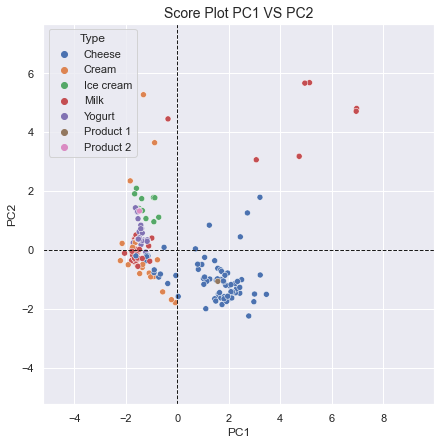

In [33]:
plt.clf
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x="PC1", y="PC2", data = scores_notCentred, hue=scores_notCentred["Type"])    
    
#Set limits for figure
x_min = min(scores_notCentred['PC1'].min(),0)-3
x_max = max(scores_notCentred['PC1'].max(),0)+3
y_min = min(scores_notCentred['PC2'].min(),0)-3
y_max = max(scores_notCentred['PC2'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC1 VS PC2", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

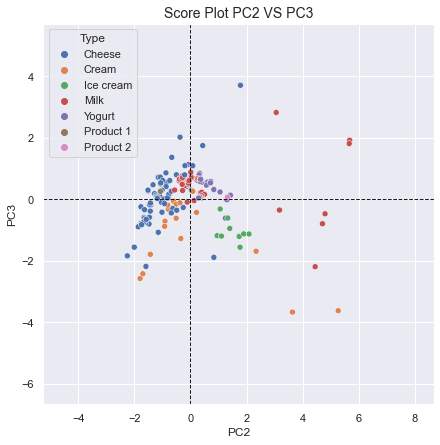

In [34]:
plt.clf
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x="PC2", y="PC3", data = scores_notCentred, hue=scores_notCentred["Type"])    
    
#Set limits for figure
x_min = min(scores_notCentred['PC2'].min(),0)-3
x_max = max(scores_notCentred['PC2'].max(),0)+3
y_min = min(scores_notCentred['PC3'].min(),0)-3
y_max = max(scores_notCentred['PC3'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC2 VS PC3", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()

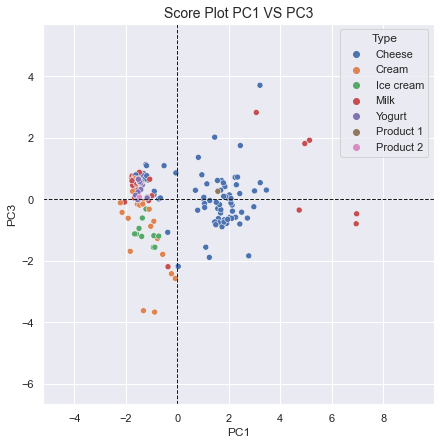

In [35]:
plt.clf
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x="PC1", y="PC3", data = scores_notCentred, hue=scores_notCentred["Type"])    
    
#Set limits for figure
x_min = min(scores_notCentred['PC1'].min(),0)-3
x_max = max(scores_notCentred['PC1'].max(),0)+3
y_min = min(scores_notCentred['PC3'].min(),0)-3
y_max = max(scores_notCentred['PC3'].max(),0)+2
  
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Score Plot PC1 VS PC3", fontsize=14)
plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
plt.show()